### Ollama activation script

In [2]:
!curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10975    0 10975    0     0  25393      0 --:--:-- --:--:-- --:--:-- 25346
>>> Downloading ollama...
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [3]:
!pip install -q pyngrok

In [1]:
import threading
import time
import os
import asyncio
from pyngrok import ngrok
import threading
import queue
import time
from threading import Thread

# Get your ngrok token from your ngrok account:
# https://dashboard.ngrok.com/get-started/your-authtoken
token="2aaPooW4DT2XR20keUJQvuWVcou_ZdWmW8z2UoUUCrdWsjU"
ngrok.set_auth_token(token)

# set up a stoppable thread (not mandatory, but cleaner if you want to stop this later
class StoppableThread(threading.Thread):
    def __init__(self, *args, **kwargs):
        super(StoppableThread, self).__init__(*args, **kwargs)
        self._stop_event = threading.Event()

    def stop(self):
        self._stop_event.set()

    def is_stopped(self):
        return self._stop_event.is_set()

def start_ngrok(q, stop_event):
    try:
        # Start an HTTP tunnel on the specified port
        public_url = ngrok.connect(11434)
        # Put the public URL in the queue
        q.put(public_url)
        # Keep the thread alive until stop event is set
        while not stop_event.is_set():
            time.sleep(1)  # Adjust sleep time as needed
    except Exception as e:
        print(f"Error in start_ngrok: {e}")

In [2]:
# Create a queue to share data between threads
url_queue = queue.Queue()

# Start ngrok in a separate thread
ngrok_thread = StoppableThread(target=start_ngrok, args=(url_queue, StoppableThread.is_stopped))
ngrok_thread.start()

In [3]:
# Wait for the ngrok tunnel to be established
while True:
    try:
        public_url = url_queue.get()
        if public_url:
            break
        print("Waiting for ngrok URL...")
        time.sleep(1)
    except Exception as e:
        print(f"Error in retrieving ngrok URL: {e}")

print("Ngrok tunnel established at:", public_url)

Ngrok tunnel established at: NgrokTunnel: "https://2dd2-34-90-147-58.ngrok-free.app" -> "http://localhost:11434"


In [4]:
import os
import asyncio

# NB: You may need to set these depending and get cuda working depending which backend you are running.
# Set environment variable for NVIDIA library
# Set environment variables for CUDA
os.environ['PATH'] += ':/usr/local/cuda/bin'
# Set LD_LIBRARY_PATH to include both /usr/lib64-nvidia and CUDA lib directories
os.environ['LD_LIBRARY_PATH'] = '/usr/lib64-nvidia:/usr/local/cuda/lib64'

async def run_process(cmd):
    print('>>> starting', *cmd)
    process = await asyncio.create_subprocess_exec(
        *cmd,
        stdout=asyncio.subprocess.PIPE,
        stderr=asyncio.subprocess.PIPE
    )

    # define an async pipe function
    async def pipe(lines):
        async for line in lines:
            print(line.decode().strip())

        await asyncio.gather(
            pipe(process.stdout),
            pipe(process.stderr),
        )

    # call it
    await asyncio.gather(pipe(process.stdout), pipe(process.stderr))

In [5]:
import asyncio
import threading

async def start_ollama_serve():
    await run_process(['ollama', 'serve'])

def run_async_in_thread(loop, coro):
    asyncio.set_event_loop(loop)
    loop.run_until_complete(coro)
    loop.close()

# Create a new event loop that will run in a new thread
new_loop = asyncio.new_event_loop()

# Start ollama serve in a separate thread so the cell won't block execution
thread = threading.Thread(target=run_async_in_thread, args=(new_loop, start_ollama_serve()))
thread.start()

>>> starting ollama serve
2024/06/28 17:47:56 routes.go:1064: INFO server config env="map[CUDA_VISIBLE_DEVICES: GPU_DEVICE_ORDINAL: HIP_VISIBLE_DEVICES: HSA_OVERRIDE_GFX_VERSION: OLLAMA_DEBUG:false OLLAMA_FLASH_ATTENTION:false OLLAMA_HOST:http://127.0.0.1:11434 OLLAMA_INTEL_GPU:false OLLAMA_KEEP_ALIVE: OLLAMA_LLM_LIBRARY: OLLAMA_MAX_LOADED_MODELS:1 OLLAMA_MAX_QUEUE:512 OLLAMA_MAX_VRAM:0 OLLAMA_MODELS:/root/.ollama/models OLLAMA_NOHISTORY:false OLLAMA_NOPRUNE:false OLLAMA_NUM_PARALLEL:1 OLLAMA_ORIGINS:[http://localhost https://localhost http://localhost:* https://localhost:* http://127.0.0.1 https://127.0.0.1 http://127.0.0.1:* https://127.0.0.1:* http://0.0.0.0 https://0.0.0.0 http://0.0.0.0:* https://0.0.0.0:* app://* file://* tauri://*] OLLAMA_RUNNERS_DIR: OLLAMA_SCHED_SPREAD:false OLLAMA_TMPDIR: ROCR_VISIBLE_DEVICES:]"
time=2024-06-28T17:47:56.070Z level=INFO source=images.go:730 msg="total blobs: 10"
time=2024-06-28T17:47:56.071Z level=INFO source=images.go:737 msg="total unused bl

### using Ollama

In [7]:
!pip install -q ollama

 ollama serve
Couldn't find '/root/.ollama/id_ed25519'. Generating new private key.
Your new public key is:

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIDzLwtqvGjYaHSlsbzvA0Lw9vZGBNrObGr//RfU73oBi

2024/06/28 17:28:35 routes.go:1064: INFO server config env="map[CUDA_VISIBLE_DEVICES: GPU_DEVICE_ORDINAL: HIP_VISIBLE_DEVICES: HSA_OVERRIDE_GFX_VERSION: OLLAMA_DEBUG:false OLLAMA_FLASH_ATTENTION:false OLLAMA_HOST:http://127.0.0.1:11434 OLLAMA_INTEL_GPU:false OLLAMA_KEEP_ALIVE: OLLAMA_LLM_LIBRARY: OLLAMA_MAX_LOADED_MODELS:1 OLLAMA_MAX_QUEUE:512 OLLAMA_MAX_VRAM:0 OLLAMA_MODELS:/root/.ollama/models OLLAMA_NOHISTORY:false OLLAMA_NOPRUNE:false OLLAMA_NUM_PARALLEL:1 OLLAMA_ORIGINS:[http://localhost https://localhost http://localhost:* https://localhost:* http://127.0.0.1 https://127.0.0.1 http://127.0.0.1:* https://127.0.0.1:* http://0.0.0.0 https://0.0.0.0 http://0.0.0.0:* https://0.0.0.0:* app://* file://* tauri://*] OLLAMA_RUNNERS_DIR: OLLAMA_SCHED_SPREAD:false OLLAMA_TMPDIR: ROCR_VISIBLE_DEVICES:]"
t

In [8]:
from IPython.display import Markdown, display

In [9]:
import ollama

In [10]:
ollama.pull("wizardcoder")

time=2024-06-28T17:29:05.342Z level=INFO source=download.go:136 msg="downloading f890c9d2e6d4 in 39 100 MB part(s)"
time=2024-06-28T17:29:37.145Z level=INFO source=download.go:136 msg="downloading 2d836d77287d in 1 61 B part(s)"
time=2024-06-28T17:29:38.983Z level=INFO source=download.go:136 msg="downloading 8fadb9ad1206 in 1 106 B part(s)"
time=2024-06-28T17:29:40.728Z level=INFO source=download.go:136 msg="downloading 58e1b82a691f in 1 18 B part(s)"
time=2024-06-28T17:29:42.736Z level=INFO source=download.go:136 msg="downloading c2623aa27c1e in 1 455 B part(s)"


{'status': 'success'}

[GIN] 2024/06/28 - 17:30:02 | 200 | 58.633880652s |       127.0.0.1 | POST     "/api/pull"


In [11]:
ollama.pull("phi3")

time=2024-06-28T17:30:06.015Z level=INFO source=download.go:136 msg="downloading b26e6713dc74 in 24 100 MB part(s)"
time=2024-06-28T17:30:25.860Z level=INFO source=download.go:136 msg="downloading fa8235e5b48f in 1 1.1 KB part(s)"
time=2024-06-28T17:30:27.694Z level=INFO source=download.go:136 msg="downloading 542b217f179c in 1 148 B part(s)"
time=2024-06-28T17:30:29.498Z level=INFO source=download.go:136 msg="downloading 8dde1baf1db0 in 1 78 B part(s)"
time=2024-06-28T17:30:32.350Z level=INFO source=download.go:136 msg="downloading f91db7a2deb9 in 1 485 B part(s)"
[GIN] 2024/06/28 - 17:30:41 | 200 |  39.34505632s |       127.0.0.1 | POST     "/api/pull"

{'status': 'success'}

In [ ]:
ollama.pull("llava")

time=2024-06-17T23:11:15.121Z level=INFO source=download.go:136 msg="downloading 170370233dd5 in 42 100 MB part(s)"
time=2024-06-17T23:11:37.956Z level=INFO source=download.go:136 msg="downloading 72d6f08a42f6 in 7 100 MB part(s)"
time=2024-06-17T23:11:42.724Z level=INFO source=download.go:136 msg="downloading 43070e2d4e53 in 1 11 KB part(s)"
time=2024-06-17T23:11:44.425Z level=INFO source=download.go:136 msg="downloading c43332387573 in 1 67 B part(s)"
time=2024-06-17T23:11:46.154Z level=INFO source=download.go:136 msg="downloading ed11eda7790d in 1 30 B part(s)"
time=2024-06-17T23:11:47.948Z level=INFO source=download.go:136 msg="downloading 7c658f9561e5 in 1 564 B part(s)"


{'status': 'success'}

[GIN] 2024/06/17 - 23:12:19 | 200 |          1m5s |       127.0.0.1 | POST     "/api/pull"


In [ ]:
ollama.pull("llama3")

time=2024-06-18T16:27:43.397Z level=INFO source=download.go:136 msg="downloading 6a0746a1ec1a in 47 100 MB part(s)"
time=2024-06-18T16:28:15.103Z level=INFO source=download.go:136 msg="downloading 4fa551d4f938 in 1 12 KB part(s)"
time=2024-06-18T16:28:17.880Z level=INFO source=download.go:136 msg="downloading 8ab4849b038c in 1 254 B part(s)"
time=2024-06-18T16:28:20.908Z level=INFO source=download.go:136 msg="downloading 577073ffcc6c in 1 110 B part(s)"
time=2024-06-18T16:28:23.265Z level=INFO source=download.go:136 msg="downloading 3f8eb4da87fa in 1 485 B part(s)"


{'status': 'success'}

[GIN] 2024/06/18 - 16:28:48 | 200 |          1m6s |       127.0.0.1 | POST     "/api/pull"


In [ ]:
ollama.pull("josiahbryan/dragon-mistral-7b-v0-q4")

time=2024-06-20T09:21:57.185Z level=INFO source=download.go:136 msg="downloading ab11de4d7d30 in 42 100 MB part(s)"
time=2024-06-20T09:22:05.206Z level=INFO source=download.go:178 msg="ab11de4d7d30 part 2 attempt 0 failed: unexpected EOF, retrying in 1s"
time=2024-06-20T09:22:48.880Z level=INFO source=download.go:136 msg="downloading 8969e4857205 in 1 29 B part(s)"
time=2024-06-20T09:22:50.977Z level=INFO source=download.go:136 msg="downloading a0e34005fd83 in 1 95 B part(s)"
time=2024-06-20T09:22:52.843Z level=INFO source=download.go:136 msg="downloading 3c22676a66bd in 1 381 B part(s)"
[GIN] 2024/06/20 - 09:23:14 | 200 |         1m18s |       127.0.0.1 | POST     "/api/pull"

{'status': 'success'}

In [6]:
!ollama list

time=2024-06-28T17:48:10.549Z level=INFO source=payload.go:44 msg="Dynamic LLM libraries [cpu cpu_avx cpu_avx2 cuda_v11 rocm_v60101]"
time=2024-06-28T17:48:10.751Z level=INFO source=types.go:98 msg="inference compute" id=GPU-321c8e11-0a7c-6b0e-4e0b-d26a642e8450 library=cuda compute=7.5 driver=12.2 name="Tesla T4" total="14.7 GiB" available="14.6 GiB"
[GIN] 2024/06/28 - 17:48:10 | 200 |    1.670077ms |       127.0.0.1 | HEAD     "/"
[GIN] 2024/06/28 - 17:48:10 | 200 |    1.856866ms |       127.0.0.1 | GET      "/api/tags"
NAME              	ID          	SIZE  	MODIFIED       
phi3:latest       	64c1188f2485	2.4 GB	17 minutes ago	
wizardcoder:latest	de9d848c1323	3.8 GB	18 minutes ago	


### main code

In [13]:
!pip install -q langchain_google_genai langchain langchain_community gradio pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB

In [ ]:
from langchain_community.llms.ollama import Ollama
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import LLMChain
from langchain_core.messages import HumanMessage, SystemMessage
from google.colab import userdata
import os
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")
# test_llm = Ollama(
#     model="llava",
#     temperature=0
# )
# test_llm.base_url
test_llm = ChatGoogleGenerativeAI(
    model="gemini-pro-vision",
    temperature=0
)


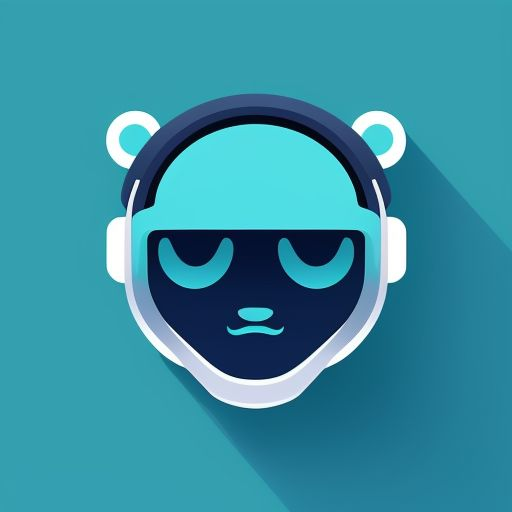

In [ ]:
from PIL import Image
image = Image.open("/content/bot_avatar_v2.jpeg")
image

In [ ]:
# Convert the image to base64
import io # Import the io module for working with in-memory byte streams
import base64 # Import the base64 module for encoding and decoding
buffered = io.BytesIO()
image.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue()).decode()


In [ ]:
messages = [
    # SystemMessage(content="Describe any given image in details"),
    HumanMessage(
        content=[
            {"type":"text", "text":"describe the following image"},
            {"type":"image_url", "image_url": f"data:image/jpeg;base64,{img_str}"}, # Pass the base64 encoded image as a string
            # {"type":"image_url", "image_url":image},
        ]
    )
]

for chunk in test_llm.stream(messages):
  print(chunk.content, end="", flush=True)

 The image is a flat design of a blue and white robot head. The robot has closed eyes and is wearing headphones. The background is a light blue color.

In [ ]:
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.chains import LLMChain
from IPython.display import Markdown, display
prompt_template = ChatPromptTemplate.from_messages([
    SystemMessage(content="You are a helpful SQL expert Bot write concise sql query."),
    HumanMessagePromptTemplate.from_template("create me  the Schema for the following sql tables{tables}"),
])
chain = LLMChain(
    llm=test_llm,
    prompt=prompt_template,
    verbose=True
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [ ]:
response = chain.invoke({
    "tables":input('give the sql tables defs:\n')
})

give the sql tables defs:
Table departments, columns = [DepartmentId, DepartmentName]   Table students, columns = [DepartmentId, StudentId, StudentName]


> Entering new LLMChain chain...
Prompt after formatting:
System: You are a helpful SQL expert Bot write concise sql query.
Human: create me  the Schema for the following sql tablesTable departments, columns = [DepartmentId, DepartmentName]   Table students, columns = [DepartmentId, StudentId, StudentName]

> Finished chain.
[GIN] 2024/06/17 - 21:58:58 | 200 |  4.575516356s |       127.0.0.1 | POST     "/api/generate"


In [ ]:
display(Markdown(response["text"]))

 Sure! Here's the schema for the two tables you described:
```sql
CREATE TABLE departments (
  DepartmentId INT PRIMARY KEY,
  DepartmentName VARCHAR(255) NOT NULL
);

CREATE TABLE students (
  DepartmentId INT NOT NULL,
  StudentId INT PRIMARY KEY,
  StudentName VARCHAR(255) NOT NULL,
  FOREIGN KEY (DepartmentId) REFERENCES departments(DepartmentId)
);
```
This schema creates two tables: `departments` and `students`. The `departments` table has a primary key of `DepartmentId` and a non-nullable column for `DepartmentName`. The `students` table also has a primary key of `StudentId`, as well as foreign keys that reference the `DepartmentId` in the `departments` table. 

In [ ]:
translation_prompt_template = ChatPromptTemplate.from_messages([
    HumanMessagePromptTemplate.from_template(
        """write a concise translation of the given text commentaries, while keeping the code or any Entity in it's original langauge (basically codes are written in english) then format the output correctly in a pretty markdown:
translate the following text:
TEXT:{text}
into {langauge}
        """
    )
])

from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata
translation_chain = LLMChain(
    llm=ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=userdata.get("GOOGLE_API_KEY")),
    prompt=translation_prompt_template,
    verbose=True
)

In [ ]:
response = translation_chain.invoke({
    "text":input('give the text to translate:\n'),
    "langauge":input('give the language to translate to:\n')
})


give the text to translate:
CREATE TABLE departments (   DepartmentId INT PRIMARY KEY,   DepartmentName VARCHAR(255) NOT NULL );  CREATE TABLE students (   DepartmentId INT NOT NULL,   StudentId INT PRIMARY KEY,   StudentName VARCHAR(255) NOT NULL,   FOREIGN KEY (DepartmentId) REFERENCES departments(DepartmentId) );  This schema creates two tables: departments and students. The departments table has a primary key of DepartmentId and a non-nullable column for DepartmentName. The students table also has a primary key of StudentId, as well as foreign keys that reference the DepartmentId in the departments table. 
give the language to translate to:
arabic


> Entering new LLMChain chain...
Prompt after formatting:
Human: write a concise translation of the given text commentaries, while keeping the code or any Entity in it's original langauge (basically codes are written in english) then format the output correctly in a pretty markdown: 
translate the following text:
TEXT:CREATE TABLE depar

In [ ]:
display(Markdown(response["text"]))

النص: CREATE TABLE departments (DepartmentId INT PRIMARY KEY, DepartmentName VARCHAR (255) NOT NULL); CREATE TABLE students (DepartmentId INT NOT NULL, StudentId INT PRIMARY KEY, StudentName VARCHAR (255) NOT NULL, FOREIGN KEY (DepartmentId) REFERENCES departments (DepartmentId)); ينشئ هذا المخطط جدولين: departments و students. يحتوي جدول الأقسام على مفتاح أساسي لـ DepartmentId وعمود غير قابل للإبطال لـ DepartmentName. يحتوي جدول الطلاب أيضًا على مفتاح أساسي لـ StudentId، بالإضافة إلى المفاتيح الخارجية التي تشير إلى DepartmentId في جدول الأقسام.

In [ ]:
formatting_prompt_template = ChatPromptTemplate.from_messages([
  HumanMessagePromptTemplate.from_template(
      """prettify the following output in a gorgeous markdown format(keep the langauge as it is wherever you find it, jus do the prettifying):
{text}
"""
  )
])
google_llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=userdata.get("GOOGLE_API_KEY"), temperature=0)
formatter_chain = LLMChain(
    llm=google_llm,
    prompt=formatting_prompt_template,
    verbose=True
)

In [ ]:
response = formatter_chain.invoke({
    "text":input('give the text to format:\n')
})

give the text to format:
النص: CREATE TABLE departments (DepartmentId INT PRIMARY KEY, DepartmentName VARCHAR (255) NOT NULL); CREATE TABLE students (DepartmentId INT NOT NULL, StudentId INT PRIMARY KEY, StudentName VARCHAR (255) NOT NULL, FOREIGN KEY (DepartmentId) REFERENCES departments (DepartmentId)); ينشئ هذا المخطط جدولين: departments و students. يحتوي جدول الأقسام على مفتاح أساسي لـ DepartmentId وعمود غير قابل للإبطال لـ DepartmentName. يحتوي جدول الطلاب أيضًا على مفتاح أساسي لـ StudentId، بالإضافة إلى المفاتيح الخارجية التي تشير إلى DepartmentId في جدول الأقسام.


> Entering new LLMChain chain...
Prompt after formatting:
Human: prettify the following output in a gorgeous markdown format(keep the langauge as it is wherever you find it, jus do the prettifying):
النص: CREATE TABLE departments (DepartmentId INT PRIMARY KEY, DepartmentName VARCHAR (255) NOT NULL); CREATE TABLE students (DepartmentId INT NOT NULL, StudentId INT PRIMARY KEY, StudentName VARCHAR (255) NOT NULL, FOREIGN

In [ ]:
display(Markdown(response["text"]))

**النص:**

```sql
CREATE TABLE departments (
  DepartmentId INT PRIMARY KEY,
  DepartmentName VARCHAR (255) NOT NULL
);

CREATE TABLE students (
  DepartmentId INT NOT NULL,
  StudentId INT PRIMARY KEY,
  StudentName VARCHAR (255) NOT NULL,
  FOREIGN KEY (DepartmentId) REFERENCES departments (DepartmentId)
);
```

**الوصف:**

ينشئ هذا المخطط جدولين: `departments` و `students`.

- يحتوي جدول `departments` على:
  - مفتاح أساسي `DepartmentId`
  - عمود غير قابل للإبطال `DepartmentName`

- يحتوي جدول `students` على:
  - مفتاح أساسي `StudentId`
  - مفتاح خارجي `DepartmentId` يشير إلى جدول `departments`

### the project

In [14]:
!pip show transformers

Name: transformers
Version: 4.41.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [15]:
!pip show diffusers

In [ ]:
!pip show accelerate

In [16]:
!pip install -q diffusers["torch"] transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 47.3 MB/s eta 0:00:00


In [17]:
!pip install -q accelerate
!pip install -q -i https://pypi.org/simple/ bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 4.2 MB/s eta 0:00:00


In [18]:
!git clone https://github.com/myshell-ai/MeloTTS.git
%cd MeloTTS
!pip install -e .
!python -m unidic download

Cloning into 'MeloTTS'...
remote: Enumerating objects: 410, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 410 (delta 161), reused 128 (delta 128), pack-reused 218
Receiving objects: 100% (410/410), 6.04 MiB | 10.26 MiB/s, done.
Resolving deltas: 100% (207/207), done.
/content/MeloTTS
Obtaining file:///content/MeloTTS
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.1/581.1 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [20]:
!pip install pyttsx3

In [19]:
!pip install gTTS

In [ ]:
import os
from pathlib import Path
from pprint import pprint
from typing import List
import ollama
import gradio as gr
from sympy import content
import traceback
import torch
from diffusers import StableDiffusion3Pipeline, AutoencoderTiny
from diffusers import StableDiffusionPipeline, AudioLDMPipeline


from PIL import Image
import io  # Import the io module for working with in-memory byte streams
import base64  # Import the base64 module for encoding and decoding
from transformers import T5EncoderModel, BitsAndBytesConfig

import scipy
from gtts import gTTS

from langchain_community.llms.ollama import Ollama
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain.prompts import (
    PromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate,
    MessagesPlaceholder,
)

from langchain.memory import ConversationBufferMemory, FileChatMessageHistory

from langchain_community.embeddings.ollama import OllamaEmbeddings
from langchain.chains import LLMChain
from langchain.chains.summarize import load_summarize_chain
from langchain.chains import RetrievalQA
from langchain_community.vectorstores.chroma import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import TextLoader, PyPDFLoader, Docx2txtLoader

from dotenv import load_dotenv, find_dotenv
from google.colab import userdata

load_dotenv(find_dotenv(), override=True)

os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")
phi_llm = Ollama(model="phi3", temperature=0.7)

# TEXT GEN AND IMAGE VIS Models INIT
google_llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.7)  # type: ignore
google_vision_llm = ChatGoogleGenerativeAI(model="gemini-pro-vision", temperature=0)  # type: ignore
formatting_prompt_template = ChatPromptTemplate.from_messages(
    [
        HumanMessagePromptTemplate.from_template(
            """prettify the following output in a gorgeous markdown format(keep the langauge as it is wherever you find it, jus do the prettifying):
{text}
"""
        )
    ]
)

formatter_chain = LLMChain(
    llm=google_llm, prompt=formatting_prompt_template, verbose=True
)
qachain = None
sumerization_chain = None
conversation_chain = None

# IMAGE GENERATION MODEL CONFIG FOR PERFORMANCE
quantization_config = BitsAndBytesConfig(load_in_8bit=True)


def sound_creator(prompt: str = "", steps: int = 10, rate: int = 16000):
    # load the model

    repo_id = "cvssp/audioldm-s-full-v2"
    pipe = AudioLDMPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    audio = pipe(prompt, num_inference_steps=steps, audio_length_in_s=5.0).audios[0]

    # save the audio sample as a .wav file
    scipy.io.wavfile.write("sound.wav", rate=rate, data=audio)


def google_speaker(text: str, language: str, filepath: str):
    speech = gTTS(text=text, lang=language, slow=False)
    speech.save(filepath)
    return filepath


def text2speech(text: str = "some example text in the English language"):
    from transformers import VitsModel, AutoTokenizer
    import torch

    model = VitsModel.from_pretrained("facebook/mms-tts-eng")
    tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-eng")

    inputs = tokenizer(text, return_tensors="pt")

    with torch.no_grad():
        output = model(**inputs).waveform

    return output, model


def text2speech_melo(text: str = "Did you ever hear a folk tale about a giant turtle?"):
    from melo.api import TTS

    # Speed is adjustable
    speed = 1.0

    # CPU is sufficient for real-time inference.
    # You can set it manually to 'cpu' or 'cuda' or 'cuda:0' or 'mps'
    device = "auto"  # Will automatically use GPU if available

    # English

    model = TTS(language="EN", device=device)
    speaker_ids = model.hps.data.spk2id

    # American accent
    output_path = "en-us.wav"
    model.tts_to_file(text, speaker_ids["EN-US"], output_path, speed=speed)

    # British accent
    output_path = "en-br.wav"
    model.tts_to_file(text, speaker_ids["EN-BR"], output_path, speed=speed)

    # Indian accent
    output_path = "en-india.wav"
    model.tts_to_file(text, speaker_ids["EN_INDIA"], output_path, speed=speed)

    # Australian accent
    output_path = "en-au.wav"
    model.tts_to_file(text, speaker_ids["EN-AU"], output_path, speed=speed)

    # Default accent
    output_path = "en-default.wav"
    model.tts_to_file(text, speaker_ids["EN-Default"], output_path, speed=speed)
    return "conversion completed"


model_ids = {
    "Overall": {
        "name": "stabilityai/stable-diffusion-xl-base-1.0",
        "downloaded": False,
    },
    "Realistic": {
        "name": "SG161222/Realistic_Vision_V6.0_B1_noVAE",
        "downloaded": False,
    },
    "Photographic": {"name": "emilianJR/epiCRealism", "downloaded": False},
    "Analogue": {"name": "wavymulder/Analog-Diffusion", "downloaded": False},
    "Photoreal": {"name": "stablediffusionapi/AbsoluteReality", "downloaded": False},
    "Anime": {"name": "stablediffusionapi/anything-v5", "downloaded": False},
    "Fantasy": {"name": "Lykon/DreamShaper", "downloaded": False},
    "Midjourney-alternative": {"name": "prompthero/openjourney", "downloaded": False},
    "Mix": {"name": "emilianJR/majicMIX_realistic_v6", "downloaded": False},
    "Best SDXL": {"name": "RunDiffusion/Juggernaut-XL-v9", "downloaded": False},
}
# model_id = "stabilityai/stable-diffusion-3-medium-diffusers"
# model_id = "emilianJR/majicMIX_realistic_v6"
# text_encoder = T5EncoderModel.from_pretrained(
#     model_id,
#     subfolder="text_encoder_3",
#     quantization_config=quantization_config,
# )
# pipe = StableDiffusion3Pipeline.from_pretrained(
# pipe = StableDiffusionPipeline.from_pretrained(
#     model_id,
#     safety_checker=None,
#     # text_encoder_3=text_encoder,
#     # device_map="balanced",
#     torch_dtype=torch.float16,
# )

# using a tiny variational auto encoder for instant latent space into pixel space decode
# pipe.vae = AutoencoderTiny.from_pretrained("madebyollin/taesd3", torch_dtype=torch.float16)
# pipe.vae.config.shift_factor = 0.0


# WORKFLOWS ACRONYMS
workflows_endonyms = {
    "Image to Text": "image2text",
    "Text to Image": "text2image",
    "Text to Text": "text2text",
    "Audio to Text": "audio2text",
    "Text to Audio": "text2audio",
}
workflow_tasks = {
    "image2text": [
        "image description",
        "extract text from image",
        "color pallet extraction",
    ],
    "text2image": [
        "image creation",
        "image edition",
        "inpainting",
        "image scaling",
        "image resolution fixing",
    ],
    "text2text": [
        "programming",
        "fixing programs",
        "conversation",
        "translation",
        "summerization",
        "question answer",
    ],
    "audio2text": [],
    "text2audio": [
        "text to speech",
        "text to sound",
    ],
}


def bot_logic(
    msg: dict,
    history: List[List[str]],
    api_key: str,
    system_prompt: str,
    temperature: float,
    conversation_history: bool,
    provider: str,
    workflow: str,
    task: str,
    style: str,
    negative_prompt: str,
    guidance_scale: float,
    steps: int,
    seeds: int,
    width: int,
    height: int,
    format: str,
    save_image: bool,
    top_k: int,
    chunk_size: int,
    chunk_overlap: int,
    summerization_algorithm: str,
    voice_tts_provider: str,
    language: str,
):
    os.environ["GOOGLE_API_KEY"] = api_key
    workflow = workflows_endonyms.get(workflow, "")
    tasks = workflow_tasks.get(workflow, [])
    if not workflow:
        raise gr.Error(
            "invalid workflow choose a different one form the workflows list in the advances section below"
        )

    if not tasks:
        raise gr.Error(
            f"invalid task not in the category {workflow} choose a different one between {workflow_tasks[workflow]} form the tasks list in the advances section below"
        )
    history_langchain_format = []
    global phi_llm
    global google_llm
    global google_vision_llm
    global formatter_chain
    global qachain
    global sumerization_chain
    global conversation_chain
    phi_llm.temperature = temperature
    google_llm.temperature = temperature
    prompt = ""
    memory = None
    messages = []
    total_response = ""
    try:

        if history:
            for human, ai in history:
                gr.Info(
                    f"human: {human if type(ai) == str else 'some media content'} ai: {ai if type(ai) == str else 'some media content'}"
                )
                print(human, ai)
                gr.Info(f"human: {human} ai: {ai}")
                history_langchain_format.append(
                    HumanMessage(content=human if human else "")
                )
                history_langchain_format.append(AIMessage(content=ai if ai else ""))
        match workflow:
            # TEXT TO AUDIO
            case "text2audio":
                match task:
                    case "text to speech":
                        match voice_tts_provider:
                            case "melo":
                                text2speech_melo(msg["text"])
                                yield (Path("en-us.wav"), "en-us.wav")
                            case "facebook":
                                output, model = text2speech(msg["text"])
                                scipy.io.wavfile.write(
                                    "facebook_speech.wav",
                                    rate=model.config.sampling_rate,
                                    data=output.float().numpy(),
                                )
                                yield (
                                    Path("facebook_speech.wav"),
                                    "facebook_speech.wav",
                                )
                            case "google":
                                google_speaker(
                                    msg["text"], language, "google_speech.wav"
                                )
                                yield (Path("google_speech.wav"), "google_speech.wav")
                            case _:
                                gr.Warning("not implemented yet")
                    case "text to sound":
                        sound_creator(msg["text"])
                        yield (Path("sound.wav"), "sound.wav")
                    case _:
                        gr.Warning("not implemented yet")
            case "audio2text":
                gr.Warning("not implemented yet")
            # IMAGE TO TEXT WORKFLOW TASKS
            case "image2text":
                if not msg["files"][0]:
                    raise gr.Error("please upload an image file for it to be processed")

                def _image_deliver() -> List[str]:

                    image_path = msg["files"][0]
                    image_name, ext = os.path.splitext(image_path)
                    print("image_path:")
                    pprint(image_path)
                    image = Image.open(image_path)

                    buffered = io.BytesIO()
                    ext = "jpeg" if ext == ".jpg" else ext.replace(".", "")
                    image.save(buffered, format=ext.upper().replace(".", ""))
                    img_str = base64.b64encode(buffered.getvalue()).decode()
                    return img_str, ext.replace(".", "")  # type: ignore

                match task:
                    case "image description":
                        img_str, ext = _image_deliver()
                        messages = [
                            HumanMessage(
                                content=[
                                    {
                                        "type": "text",
                                        "text": """
  Task: Generate an image prompt or object detection parameters from a fully detailed description. The prompt or parameters should be accurate and complete, and should be in a format that is compatible with Image Generation models
  """,
                                    },
                                    {
                                        "type": "image_url",
                                        "image_url": f"data:image/{ext};base64,{img_str}",
                                    },  # Pass the base64 encoded image as a string
                                    # {"type": "image_url", "image_url": image},
                                ]
                            )
                        ]

                    case "extract text from image":
                        img_str, ext = _image_deliver()

                        messages = [
                            HumanMessage(
                                content=[
                                    {
                                        "type": "text",
                                        "text": """
  Task: Extract text from the provided image file. The text should be accurate and complete, and it should be formatted in a way that is easy to read and understand.

  Input: The input to the system will be an image file. The image file can be in any common format, such as JPEG, PNG, or TIFF.

  Output: The output of the system will be a textual output  containing the extracted text. The output should be encoded in UTF-8 format.
                                      """,
                                    },
                                    {
                                        "type": "image_url",
                                        "image_url": f"data:image/{ext};base64,{img_str}",
                                    },  # Pass the base64 encoded image as a string
                                    # {"type": "image_url", "image_url": image},
                                ]
                            )
                        ]

                    case "color pallet extraction":
                        img_str, ext = _image_deliver()

                        messages = [
                            HumanMessage(
                                content=[
                                    {
                                        "type": "text",
                                        "text": """
  Task: Extract the dominant colors or color palette from the provided image.
  The colors should be accurately represented and should be in a format that is easy to use and understand.


  Output:
      - LIST OF HEX OR RGBA OR HSL, with each color in front of it's suggested name.
      - categorise the colors into the contextual colors in bootstrap framework(PRIMARY, SECONDARY, INFO, WARNING, DANGER, SUCCESS, DARK, LIGHT, BLACK, WHITE).
  """,
                                    },
                                    {
                                        "type": "image_url",
                                        "image_url": f"data:image/{ext};base64,{img_str}",
                                    },  # Pass the base64 encoded image as a string
                                    # {"type": "image_url", "image_url": image},
                                ]
                            )
                        ]

                history_langchain_format.extend(messages)
                pprint(messages)

                for chunk in formatter_chain.stream(
                    google_vision_llm.invoke(messages).content  # type: ignore
                ):

                    pprint(chunk)
                    print(chunk["text"], end="", flush=True)
                    total_response += chunk["text"]
                    yield total_response

            # IMAGE GEN WORKFLOW TASKS
            case "text2image":
                model_id_info = model_ids.get(style, "")
                if not model_id_info:
                    raise gr.Error(
                        "invalid style choose a different one form the styles list in the advances section below"
                    )
                model_id = model_id_info.get("name", "")  # type: ignore
                gr.Info(f"the chosen style is {style} with the model {model_id}")

                pipe = StableDiffusionPipeline.from_pretrained(
                    model_id,
                    # text_encoder_3=text_encoder,
                    # device_map="balanced",
                    torch_dtype=torch.float16,
                    safety_checker=None,
                )
                pipe = pipe.to("cuda")
                pipe.safety_checker = None
                pipe.requires_safety_checker = False
                model_id_info["downloaded"] = True  # type: ignore
                if not model_id_info["downloaded"]:  # type: ignore
                    raise gr.Error(
                        f"the model {model_id} hasn't been downlaoded yet try again!"
                    )
                match task:
                    case "image creation":
                        image = pipe(
                            prompt=msg["text"],
                            negative_prompt=negative_prompt,
                            guidance_scale=guidance_scale,
                            num_inference_steps=steps,
                            width=width,
                            height=height,
                            generator=torch.Generator("cuda").manual_seed(seeds),
                        ).images[0]

                    case "image edition":
                        image = pipe(
                            prompt=msg["text"],
                            negative_prompt=negative_prompt,
                            guidance_scale=guidance_scale,
                            num_inference_steps=steps,
                            width=width,
                            height=height,
                            generator=torch.Generator("cuda").manual_seed(seeds),
                            init_image=Image.open(msg["files"][0]),
                        ).images[0]

                    case "inpainting":
                        gr.Warning("not implemented yet")
                    case "image scaling":
                        gr.Warning("not implemented yet")
                    case "image resolution fixing":
                        gr.Warning("not implemented yet")

                if not save_image:
                    image_name = f".image.{format.lower()}"
                    gr.Info(f"created the image {image_name}")
                else:
                    image_name = f"image.{format.lower()}"

                image.save(image_name)
                # Assuming 'image' is your PIL Image object
                # buffered = io.BytesIO()
                # image.save(buffered, format=format)  # Or another suitable format
                # img_str = base64.b64encode(buffered.getvalue()).decode()
                yield (
                    Path(
                        image_name
                    ),  # Yield the base64 encoded image URL as a dictionary
                    msg["text"],  # Yield the text message as a dictionary
                )
            # TEXT GEN WORKFLOW TASKS
            case "text2text":
                if msg["files"]:
                    filepath, ext = os.path.splitext(msg["files"][0])
                    history = []
                    raise gr.Error(
                        f"Choose a Workflow suitable for the {ext} file types"
                    )
                else:
                    history_ollama_format = []
                    for human, ai in history:
                        history_ollama_format.append(
                            {"role": "user", "content": f"{human}"}
                        )
                        history_ollama_format.append(
                            {"role": "assistant", "content": f"{ai}"}
                        )
                    history_ollama_format.append(
                        {"role": "user", "content": msg["text"]}
                    )

                    match task:
                        case "programming":
                            history_ollama_format.append(
                                {
                                    "role": "system",
                                    "content": "you are a great python programmer , you write games code in very perfect way,  you give accurate code without any errors"
                                    + system_prompt,
                                }
                            )
                            for chunk in ollama.chat(
                                model="wizardcoder",
                                messages=history_ollama_format,
                                stream=True,
                            ):
                                print(
                                    chunk["message"]["content"],  # type: ignore
                                    end="",
                                    flush=True,
                                )
                                total_response += chunk["message"][  # type: ignore
                                    "content"
                                ]
                                yield total_response
                        case "fixing programs":
                            history_ollama_format.append(
                                {
                                    "role": "system",
                                    "content": "you are a great python programmer and debugger , you take the code and perform full scan up to down, you fix any errors if there is and apply the best solution to the problem"
                                    + system_prompt,
                                }
                            )
                            for chunk in ollama.chat(
                                model="wizardcoder",
                                messages=history_ollama_format,
                                stream=True,
                            ):
                                print(
                                    chunk["message"]["content"],  # type: ignore
                                    end="",
                                    flush=True,
                                )
                                total_response += chunk["message"][  # type: ignore
                                    "content"
                                ]
                                yield total_response

                        case "conversation":
                            default_system_prompt = f"""
Instructions: Engage in a natural and coherent conversation with the user on the topic of the user.
Respond appropriately and provide informative or engaging responses that keep the conversation going.
Do not: Use offensive or harmful language. Do not impersonate a real person. Do not share personal or confidential information.
Additional notes: You may use emojis or other non-verbal cues to enhance the conversation. If you are unsure how to respond, please ask for clarification
"""
                            if conversation_history:
                                (
                                    history_langchain_format.append(
                                        ("system", default_system_prompt)
                                    )
                                    if provider == "ollama"
                                    else None
                                )
                                #                     if "GOOGLE_API_KEY" in os.environ:
                                #                         llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=temperature) # type: ignore
                                # appending the human prompt to the to the langchain messages to be sent to the conversational bot llm

                                history_langchain_format.append(
                                    (
                                        "human",
                                        (
                                            msg["text"]
                                            if provider == "ollama"
                                            else default_system_prompt + msg["text"]
                                        ),
                                    )
                                )
                                # check if there is a previous chat history file

                                if os.path.exists("chat_history.json"):
                                    memory = ConversationBufferMemory(
                                        memory_key="chat_history",
                                        chat_memory=FileChatMessageHistory(
                                            "chat_history.json"
                                        ),
                                        return_messages=True,
                                    )

                                    prompt_template = """{content}"""
                                    prompt = ChatPromptTemplate.from_messages(
                                        [
                                            MessagesPlaceholder(
                                                variable_name="chat_history"
                                            ),
                                            HumanMessagePromptTemplate.from_template(
                                                template=prompt_template
                                            ),
                                        ],
                                    )
                                    history_langchain_format.extend(
                                        prompt.format_messages(content=msg["text"])
                                    )
                                    gr.Info(
                                        f"the messages have been appended successfully with {len(history_langchain_format)} message"
                                    )
                                # check if any conversation chain is already set
                                if not conversation_chain:
                                    # PART ONE: INITIALIZING THE CONVERSATION CHAIN
                                    gr.Info(
                                        f"starting initializing the conversation chain...."
                                    )

                                    conversation_chain = LLMChain(
                                        llm=(
                                            phi_llm
                                            if provider == "ollama"
                                            else google_llm
                                        ),
                                        prompt=prompt,
                                        memory=memory,
                                        verbose=True,
                                    )
                                    # executing the chain to answer the question based on the previous chat history

                                for chunk in conversation_chain.stream(  # type: ignore
                                    history_langchain_format
                                ):

                                    print(chunk, end="", flush=True)
                                    total_response += chunk
                                    yield total_response
                            if not conversation_history:
                                match provider:
                                    case "google":
                                        if "GOOGLE_API_KEY" in os.environ:

                                            prompt = PromptTemplate.from_template(
                                                f"{default_system_prompt}\n {msg['text']}"
                                            )
                                            formatted_prompt = prompt.format(
                                                message=msg["text"],
                                                system_prompt=system_prompt,
                                            )
                                            history_langchain_format.append(
                                                formatted_prompt
                                            )
                                            pprint(history_langchain_format)

                                            for chunk in google_llm.stream(
                                                history_langchain_format
                                            ):

                                                print(chunk, end="", flush=True)
                                                total_response += chunk.content  # type: ignore
                                                yield total_response
                                        else:
                                            raise gr.Error(
                                                "Provide the Google API key to continue"
                                            )

                                    case "ollama":
                                        history_ollama_format = []
                                        for human, ai in history:
                                            history_ollama_format.append(
                                                {
                                                    "role": "user",
                                                    "content": f"{human if type(ai) == str else 'some media content'}",
                                                }
                                            )
                                            history_ollama_format.append(
                                                {
                                                    "role": "assistant",
                                                    "content": f"{ai if type(ai) == str else 'some media content'}",
                                                }
                                            )
                                        history_ollama_format.append(
                                            {
                                                "role": "system",
                                                "content": default_system_prompt
                                                + system_prompt,
                                            }
                                        )
                                        history_ollama_format.append(
                                            {"role": "user", "content": msg["text"]}
                                        )

                                        for chunk in ollama.chat(
                                            model="phi3",
                                            messages=history_ollama_format,
                                            stream=True,
                                        ):
                                            print(
                                                chunk["message"]["content"],  # type: ignore
                                                end="",
                                                flush=True,
                                            )
                                            total_response += chunk["message"][  # type: ignore
                                                "content"
                                            ]
                                            yield total_response

                        case "translation":

                            translation_prompt_template = ChatPromptTemplate.from_messages(
                                [
                                    HumanMessagePromptTemplate.from_template(
                                        """
  write a concise translation of the given text commentaries, while keeping the code or any Entities (country names, person names, organisations, acronyms etc) in it's original langauge (basically codes are written in english):
  translate the following text:
  TEXT:{text}
  into {langauge}
  """
                                    )
                                ]
                            )

                            translation_chain = LLMChain(
                                llm=google_llm,
                                prompt=translation_prompt_template,
                                verbose=True,
                            )

                            for chunk in formatter_chain.stream(
                                translation_chain.invoke(
                                    {"text": msg["text"], "langauge": "arabic"}
                                )
                            ):

                                print(chunk, end="", flush=True)
                                total_response += chunk["text"]
                                yield total_response

                        case "summerization":
                            # check if the summerization chain is initialized otherwise skipping to the summerization part
                            if not sumerization_chain:
                                # PART ONE: FETCHING DOCUMENT
                                url = msg["files"][0]
                                if not os.path.exists(url):
                                    raise FileNotFoundError(
                                        f"file {url} doesn't exist!"
                                    )

                                filename, ext = os.path.splitext(url)
                                print("filename, ext:")
                                print(filename, ext)

                                gr.Info(f"started loading docs ...")
                                match ext.replace(".", ""):

                                    case "md" | "txt":

                                        print("This is a markdown or textual file")

                                        loader = TextLoader(url)

                                    case "pdf":

                                        loader = PyPDFLoader(url)

                                        print("This is a pdf file")

                                    case "docx" | "doc" | "odt":

                                        loader = Docx2txtLoader(url)

                                        print("This is a word document file")

                                    case _:
                                        raise gr.Error(
                                            f"This is an unknown file type ,extention {ext} not supported"
                                        )

                                documents = loader.load()
                                gr.Info(f"Loaded all {msg['files']} successfully")
                                pprint(documents[:3])
                                chunks = RecursiveCharacterTextSplitter(
                                    chunk_size=chunk_size, chunk_overlap=chunk_overlap
                                ).split_documents(documents)
                                gr.Info(f"chunking completed successfully")
                                pprint(chunks[:3])
                                # PART TWO: initializing the summerization chain
                                sumerization_chain = load_summarize_chain(
                                    llm=phi_llm,
                                    chain_type=summerization_algorithm,
                                    verbose=True,
                                )

                            summary = (
                                sumerization_chain.run(chunks)
                                if sumerization_chain
                                else gr.Info("summary chain not initialized")
                            )
                            gr.Info(f"summerization completed successfully")
                            pprint(summary[:50])  # type: ignore
                            yield summary

                        case "question answer":
                            # check for the question answer chain qachain existence if there is a qachain then there is no need for the initializaion pipeline and could directly skip to chat mode
                            if not qachain:
                                # PART ONE: LOADING FILES
                                urls = msg["files"]
                                documents = []
                                for url in urls:
                                    if not os.path.exists(url):
                                        raise FileNotFoundError(
                                            f"file {url} doesn't exist!"
                                        )

                                    filename, ext = os.path.splitext(url)
                                    print("filename, ext:")
                                    print(filename, ext)

                                    gr.Info(f"started loading docs ...")
                                    match ext.replace(".", ""):

                                        case "md" | "txt":

                                            print("This is a markdown or textual file")

                                            loader = TextLoader(url)

                                        case "pdf":

                                            loader = PyPDFLoader(url)

                                            print("This is a pdf file")

                                        case "docx" | "doc" | "odt":

                                            loader = Docx2txtLoader(url)

                                            print("This is a word document file")

                                        case _:
                                            raise gr.Error(
                                                f"This is an unknown file type ,extention {ext} not supported"
                                            )

                                    documents += loader.load()
                                gr.Info(f"Loaded all {msg['files']} successfully")
                                pprint(documents[:3])

                                # PART TWO: SPLITTING INTO CHUNKS
                                gr.Info(f"started chunking ...")
                                text_splitter = RecursiveCharacterTextSplitter(
                                    chunk_size=chunk_size, chunk_overlap=chunk_overlap
                                )
                                print("text_splitter:")
                                pprint(text_splitter)
                                extracted_text = "\n".join(
                                    [page.page_content for page in documents]
                                )
                                print("extracted_text:")
                                pprint(extracted_text[:50])
                                chunks = text_splitter.split_text(extracted_text)

                                print("chunks:")
                                gr.Info(f"chunking completed successfully")
                                pprint(chunks[:3])

                                # PART THREE: EMBEDDING
                                gr.Info(f"starting embedding ...")
                                embedder = OllamaEmbeddings(model="phi3")

                                vector_store = Chroma.from_texts(chunks, embedder)

                                print("vector_store:")

                                gr.Info(f"embedding completed successfully")
                                pprint(vector_store)

                                # PART FOUR: INITIALIZING THE CHAIN
                                gr.Info(f"started initializing ....")
                                qachain = RetrievalQA.from_chain_type(
                                    phi_llm,
                                    verbose=True,
                                    retriever=vector_store.as_retriever(
                                        search_type="similarity",
                                        search_kwargs={"k": top_k},
                                    ),
                                    chain_type="stuff",
                                    return_source_documents=True,
                                )
                                gr.Info(f"finished initializing successfully")
                                print(" QA chain:")
                                pprint(qachain)

                            with open("response.md", "w") as outfile:

                                response = qachain.invoke(msg["text"])  # type: ignore
                                total_response += response.get("result")
                                print(response.get("result"), file=outfile)
                                for docid, doc in enumerate(
                                    response.get(
                                        "source_documents", "no source documents"
                                    )
                                ):
                                    total_response += f"\n### document number {docid}\n"
                                    total_response += doc.page_content
                                yield total_response
    except Exception as e:
        # showing the exception and the line in which it had occured
        raise gr.Error(f"The error is:\n{e}")
        traceback.print_exc()


app = gr.ChatInterface(
    fn=bot_logic,
    multimodal=True,
    chatbot=gr.Chatbot(label="Chat Messages:"),
    textbox=gr.MultimodalTextbox(placeholder="your question:"),
    additional_inputs_accordion=gr.Accordion("Advanced:", open=False),
    additional_inputs=[
        gr.Textbox(label="Api key:", type="password", show_copy_button=True),
        gr.TextArea(
            label="System prompt:", placeholder="place your system prompt here"
        ),
        gr.Number(label="Creativity", maximum=1, minimum=0, value=0.7),
        gr.Checkbox(label="Conversation with previous history", value=False),
        gr.Radio(label="Provider", choices=["ollama", "google"], value="ollama"),
        gr.Dropdown(
            label="Workflows",
            choices=["Image to Text", "Text to Image", "Text to Text", "Text to Audio"],
            value="Text to Text",
        ),
        gr.Dropdown(
            label="Workflow Tasks",
            choices=[
                "text to speech",
                "text to sound",
                "speech to text",
                "image description",
                "extract text from image",
                "color pallet extraction",
                "image creation",
                "image edition",
                "inpainting",
                "image scaling",
                "image resolution fixing",
                "programming",
                "fixing programs",
                "conversation",
                "translation",
                "summerization",
                "question answer",
            ],
            value="conversation",
        ),
        gr.Radio(
            label="Style",
            choices=[
                "Overall",
                "Realistic",
                "Photographic",
                "Analogue",
                "Photoreal",
                "Anime",
                "Fantasy",
                "Surrealism",
                "Mix",
                "Best SDXL",
            ],
            value="Mix",
        ),
        gr.Textbox(
            label="Negative Prompt",
            placeholder="place your negative prompt here",
            value="easynegative,,bad face,disfigured face,bad anatomy,lowres,text,error,missing finger,cross eyed,bad proportions,gross proportions,poorly drawn face,extra foot,extra leg,disfigured,blurry,extra arm,extra hand,missing leg,missing arm,deformed limb,polar lowres,bad body,mutated hands,long neck,cropped,poorley drawn hand,bad feet",
        ),
        gr.Slider(
            label="Guidance",
            minimum=0,
            maximum=1,
            step=0.1,
            value=0.7,
        ),
        gr.Number(
            label="Steps",
            minimum=0,
            maximum=50,
            step=1,
            value=25,
        ),
        gr.Number(
            label="Seeds",
            minimum=0,
            maximum=2147483647,
            step=1,
            value=42,
        ),
        gr.Number(
            label="width",
            minimum=0,
            maximum=4096,
            step=1,
            value=512,
        ),
        gr.Number(
            label="height",
            minimum=0,
            maximum=4096,
            step=1,
            value=512,
        ),
        gr.Radio(
            label="Format",
            choices=[
                "PNG",
                "JPEG",
            ],
            value="JPEG",
        ),
        gr.Checkbox(
            label="Save Image",
            value=False,
        ),
        gr.Number(
            label="top k result:",
            minimum=0,
            maximum=20,
            step=1,
            value=4,
        ),
        gr.Number(
            label="chunk size",
            minimum=0,
            maximum=4096,
            step=1,
            value=1000,
        ),
        gr.Number(
            label="chunk overlaping",
            minimum=0,
            maximum=4096,
            step=1,
            value=200,
        ),
        gr.Dropdown(
            label="summerization algorithm",
            choices=["stuff", "map_reduce", "refiner"],
            value="map_reduce",
        ),
        gr.Dropdown(
            label="speech vocalist provider",
            choices=["melo", "facebook", "google"],
            value="melo",
        ),
        gr.Dropdown(
            label="speech vocalist language",
            choices=["ar", "en", "fr"],
            value="en",
        ),
    ],
)

app.launch(
    debug=True,
    share=True,
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://d634cbd9e411220a46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


time=2024-06-28T17:49:02.764Z level=INFO source=memory.go:309 msg="offload to cuda" layers.requested=-1 layers.model=33 layers.offload=33 layers.split="" memory.available="[14.6 GiB]" memory.required.full="3.6 GiB" memory.required.partial="3.6 GiB" memory.required.kv="768.0 MiB" memory.required.allocations="[3.6 GiB]" memory.weights.total="2.9 GiB" memory.weights.repeating="2.8 GiB" memory.weights.nonrepeating="77.1 MiB" memory.graph.full="128.0 MiB" memory.graph.partial="128.0 MiB"
time=2024-06-28T17:49:02.765Z level=INFO source=server.go:368 msg="starting llama server" cmd="/tmp/ollama3158735829/runners/cuda_v11/ollama_llama_server --model /root/.ollama/models/blobs/sha256-b26e6713dc749dda35872713fa19a568040f475cc71cb132cff332fe7e216462 --ctx-size 2048 --batch-size 512 --embedding --log-disable --n-gpu-layers 33 --parallel 1 --port 42801"
time=2024-06-28T17:49:02.765Z level=INFO source=sched.go:382 msg="loaded runners" count=1
time=2024-06-28T17:49:02.765Z level=INFO source=server.go

In [ ]:
prompt = input("give your prompt:")
reponse = ollama.generate(
    system="""
you are a great python programmer , you write games code in very perfect way,  you give accurate code without any errors
""",
    prompt=f"""write me the code for:
{prompt}
""",
    model="wizardcoder"
)

give your prompt:tiktaktoe game
time=2024-06-17T15:14:24.876Z level=INFO source=memory.go:133 msg="offload to gpu" layers.requested=-1 layers.real=33 memory.available="14.6 GiB" memory.required.full="13.1 GiB" memory.required.partial="13.1 GiB" memory.required.kv="8.0 GiB" memory.weights.total="3.5 GiB" memory.weights.repeating="3.4 GiB" memory.weights.nonrepeating="102.6 MiB" memory.graph.full="1.1 GiB" memory.graph.partial="1.3 GiB"
time=2024-06-17T15:14:24.877Z level=INFO source=memory.go:133 msg="offload to gpu" layers.requested=-1 layers.real=33 memory.available="14.6 GiB" memory.required.full="13.1 GiB" memory.required.partial="13.1 GiB" memory.required.kv="8.0 GiB" memory.weights.total="3.5 GiB" memory.weights.repeating="3.4 GiB" memory.weights.nonrepeating="102.6 MiB" memory.graph.full="1.1 GiB" memory.graph.partial="1.3 GiB"
time=2024-06-17T15:14:24.877Z level=INFO source=server.go:341 msg="starting llama server" cmd="/tmp/ollama2822384352/runners/cuda_v11/ollama_llama_server 

In [ ]:
prompt = input("give your prompt:")
reponse = ollama.generate(
    system="""
you are a great python programmer and debugger , you take the code and perform full scan up to down, you fix any errors if there is and apply the best solution to the problem""",
    prompt=f"""debug and fix the code:
{prompt}
""",
    model="wizardcoder"
)

In [ ]:
prompt = input("give your prompt:")
reponse = ollama.generate(
    system="""
you are a great python programmer and pretty formatter , you take the chaoactic code and you formatt it in a markdown format """,
    prompt=f"""prettify the following code:
{prompt}
""",
    model="wizardcoder"
)

give your prompt:you are a great python programmer and pretty formatter , you take the chaoactic code and you formatt it in a markdown format """,
[GIN] 2024/06/17 - 15:25:53 | 200 | 11.117337907s |       127.0.0.1 | POST     "/api/generate"


In [ ]:
display(Markdown(reponse["response"]))

```python
import random
from datetime import datetime, timedelta
from flask import Flask, jsonify, request

app = Flask(__name__)


@app.route('/')
def hello_world():
    return 'Hello World!'

@app.route('/time')
def get_current_time():
    now = datetime.now()
    expire_time = now + timedelta(minutes=1)
    token = random.randint(0, 99999999)
    response = {
        'access_token': str(token),
        'expires_in': (expire_time - now).total_seconds()
    }
    return jsonify(response)
```

Here is the formatted version of the code using markdown:

```python
import random
from datetime import datetime, timedelta
from flask import Flask, jsonify, request

app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello World!'

@app.route('/time')
def get_current_time():
    now = datetime.now()
    expire_time = now + timedelta(minutes=1)
    token = random.randint(0, 9999999)
    response = {
        'access_token': str(token),
        'expires_in': (expire_time - now).total_seconds()
    }
    return jsonify(response) 
```

In this code, we have a Flask app that defines two routes: one returns the string "Hello World" and the other provides an access token with a random number as its value and expiration time set to one minute in the future. The `timedelta` function is used to add 1 minute to the current time and calculate the difference between it and the current time, which is stored in seconds in the variable `expire_time`. The response is then returned in JSON format using the `jsonify()` method. 

### phi3 classification

In [ ]:
prompt = input("give your prompt:")
response = ollama.generate(
    model="phi3",
    system="""you answer only in json format, classify it into (IMAGE-to-TEXT,TEXT-to-IMAGE,AUDIO-to-TEXT,TEXT-to-AUDIO)
here are some hints:
 - when the prompt is having some keywords refering to sound or music or tones or types of music (pop, hiphop, jazz) in a comma separated values prompt then it's an audio one,
 - when it's in a descriptive way, or containing words refering to image or illustration or picture or visualistion then it is a Image one,
 - when it giving you instructions or questions about content then it's either Image to text (when demanding describing an image or such a thing ) or Text to Text (like asking to write something in a certain format which doesn't refer to sound thing so it doesn't conflict with an audio prompt)
,your output should look like:
{
    "classification": <classification>,
    "prompt": <prompt>,
    "explanations": <explanations>
}
""",
    prompt=f"given the following prompt: {prompt} do the classification"
)

In [ ]:
from pprint import pprint
import json

In [ ]:
cleaned_response = response["response"].strip().replace("\n", "")

In [ ]:
cleaned_response

'{    "classification": "AUDIO-TO-TEXT",    "prompt": "afrobeat, afrobeats, afro house, afro trap, aftro, international afrobeat, amapiano, afro-pop, west african music",    "explanations": "The given prompt includes keywords that refer to different types of music or sound genres. These terms are related to audio content, hence the classification is Audio-to-Text as it implies describing these musical styles in text form."}'

## Hugging face models script

In [ ]:
!pip install transformers>=4.32.0 optimum>=1.12.0
!pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu118/  # Use cu117 if on CUDA 11.7


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://huggingface.github.io/autogptq-index/whl/cu118/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 36.0 MB/s eta 0:00:00


### or you can use

In [ ]:
!pip uninstall -y auto-gptq
!git clone https://github.com/PanQiWei/AutoGPTQ
%cd AutoGPTQ
!pip install .

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_name_or_path = "TheBloke/WizardCoder-Python-7B-V1.0-GPTQ"
# To use a different branch, change revision
# For example: revision="main"
model = AutoModelForCausalLM.from_pretrained(model_name_or_path,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             revision="main")

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

prompt = "write me djikstra shortest path algorithm in a pipeline of functional programming with a graph to svg utility function"
prompt_template=f'''Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{prompt}

### Response:

'''

print("\n\n*** Generate:")

input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
output = model.generate(inputs=input_ids, temperature=0.7, do_sample=True, top_p=0.95, top_k=40, max_new_tokens=512)
print(tokenizer.decode(output[0]))

# Inference can also be done using transformers' pipeline

print("*** Pipeline:")
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    do_sample=True,
    temperature=0.7,
    top_p=0.95,
    top_k=40,
    repetition_penalty=1.1
)

print(pipe(prompt_template)[0]['generated_text'])